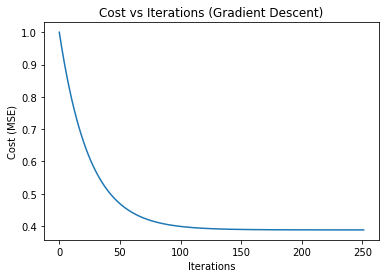

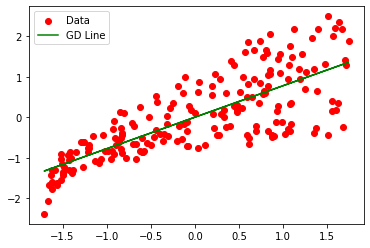

Gradient Descent → m: 0.7774126815963284 b: -2.775557561562893e-16
Sklearn → m: 0.04753664043301975 b: 7.032593549127695
Multi-Feature GD coefficients: [ 0.75306591  0.53648155 -0.00433069] Intercept: -5.542233338928782e-17
SGD → m: 0.779066190007287 b: -0.04051362014958167
Mini-Batch GD → m: 0.8070184073899899 b: -0.0008216366441547826


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# -------------------------------------------------
# 1. Batch Gradient Descent (Single Feature)
# -------------------------------------------------
def gradient_descent(x, y, lr=0.01, iterations=3000):
    x_norm = (x - x.mean()) / x.std()
    y_norm = (y - y.mean()) / y.std()

    m = b = 0.0
    n = len(x_norm)
    cost_history = []

    for i in range(iterations):
        y_pred = m * x_norm + b
        cost = np.mean((y_norm - y_pred) ** 2)
        cost_history.append(cost)

        md = -(2/n) * np.sum(x_norm * (y_norm - y_pred))
        bd = -(2/n) * np.sum(y_norm - y_pred)

        m -= lr * md
        b -= lr * bd

        if i > 1 and abs(cost_history[-2] - cost) < 1e-6:
            break

    return m, b, x_norm, y_norm, cost_history


# -------------------------------------------------
# 2. Multi-Feature Gradient Descent
# -------------------------------------------------
def gradient_descent_multi(X, y, lr=0.01, iterations=3000):
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    y = (y - y.mean()) / y.std()

    m = np.zeros(X.shape[1])
    b = 0.0
    n = len(y)

    for _ in range(iterations):
        y_pred = np.dot(X, m) + b
        dm = -(2/n) * np.dot(X.T, (y - y_pred))
        db = -(2/n) * np.sum(y - y_pred)

        m -= lr * dm
        b -= lr * db

    return m, b


# -------------------------------------------------
# 3. Stochastic Gradient Descent (SGD)
# -------------------------------------------------
def stochastic_gd(x, y, lr=0.01, epochs=50):
    x = (x - x.mean()) / x.std()
    y = (y - y.mean()) / y.std()

    m = b = 0.0
    n = len(x)

    for _ in range(epochs):
        for i in range(n):
            y_pred = m * x[i] + b
            error = y[i] - y_pred
            m += lr * error * x[i]
            b += lr * error

    return m, b


# -------------------------------------------------
# 4. Mini-Batch Gradient Descent
# -------------------------------------------------
def mini_batch_gd(x, y, lr=0.01, batch_size=32, epochs=100):
    x = (x - x.mean()) / x.std()
    y = (y - y.mean()) / y.std()

    m = b = 0.0
    n = len(x)

    for _ in range(epochs):
        for i in range(0, n, batch_size):
            xb = x[i:i+batch_size]
            yb = y[i:i+batch_size]

            y_pred = m * xb + b
            md = -(2/len(xb)) * np.sum(xb * (yb - y_pred))
            bd = -(2/len(xb)) * np.sum(yb - y_pred)

            m -= lr * md
            b -= lr * bd

    return m, b


# -------------------------------------------------
# MAIN
# -------------------------------------------------
if __name__ == "__main__":

    df = pd.read_csv("Advertising.csv")

    # -------- Single Feature GD --------
    x = df["TV"].values
    y = df["Sales"].values

    m, b, x_norm, y_norm, cost_history = gradient_descent(x, y)

    # Cost vs Iterations
    plt.plot(cost_history)
    plt.xlabel("Iterations")
    plt.ylabel("Cost (MSE)")
    plt.title("Cost vs Iterations (Gradient Descent)")
    plt.show()

    # Regression Line
    plt.scatter(x_norm, y_norm, color="red", label="Data")
    plt.plot(x_norm, m * x_norm + b, color="green", label="GD Line")
    plt.legend()
    plt.show()

    # -------- Sklearn Comparison --------
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)

    print("Gradient Descent → m:", m, "b:", b)
    print("Sklearn → m:", model.coef_[0], "b:", model.intercept_)

    # -------- Multi-Feature GD --------
    X = df[["TV", "Radio", "Newspaper"]].values
    m_multi, b_multi = gradient_descent_multi(X, y)
    print("Multi-Feature GD coefficients:", m_multi, "Intercept:", b_multi)

    # -------- SGD & Mini-Batch --------
    m_sgd, b_sgd = stochastic_gd(x, y)
    m_mb, b_mb = mini_batch_gd(x, y)

    print("SGD → m:", m_sgd, "b:", b_sgd)
    print("Mini-Batch GD → m:", m_mb, "b:", b_mb)